In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv


In [2]:
#importing libraries 
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer

In [3]:
#loading the ecommerce dataset 

df = pd.read_csv('/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv')

In [4]:
#to check the top 5 records 
df.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [5]:
#checking the column name 
df.columns

Index(['Household', 'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and s

In [6]:
#renaming the column 
df.rename( columns={"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room.":"content" } ,inplace=True)

In [7]:
df.head()

,Household,content
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [8]:
df.shape

(50424, 2)

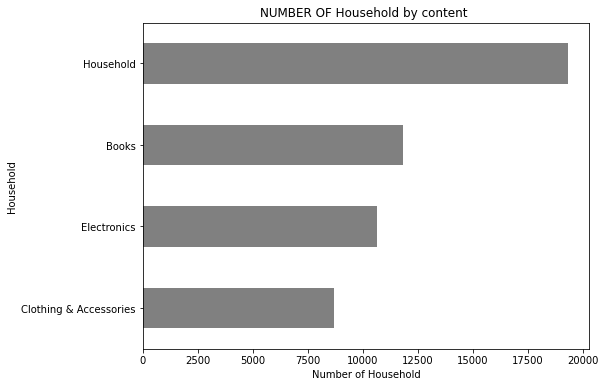

In [9]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df.groupby('Household').content.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF Household by content ')
plt.xlabel('Number of Household', fontsize = 10);

In [10]:
df['content'][0]

"SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Painting made up in synthetic frame with UV textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch (A perfect gift for your special ones)."

In [11]:
# A function to clean up the text content in the dataframe 
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [12]:
#applying the function to clean up the data in the content dataframe
df['content']=df['content'].apply(lambda x:review_cleaning(x))
df.tail()

,Household,content
50419,Electronics,strontium microsd class memory card black wi...
50420,Electronics,crossbeats wave waterproof bluetooth wireless ...
50421,Electronics,karbonn titanium wind white karbonn titanium ...
50422,Electronics,samsung guru fm plus black colourblack comp...
50423,Electronics,micromax canvas win white


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(df['content'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['content' , 'count'])

the 214754
and 194128
of 126112
to 113567
for 83106
in 74515
with 73478
is 69228
your 49225
you 44152
it 41830
this 38366
on 28755
that 27411
from 27034
or 25005
can 23922
as 23501
are 22587
be 20155


In [15]:
#Function to get top trigram words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_trigram(df['content'], 20)

#Printing word and their respective frequencies
for word, freq in common_words:
    print(word, freq)

#Creating a dataframe with words and count
df6 = pd.DataFrame(common_words, columns = ['content' , 'count'])

#Grouping the words and plotting their frequencies
df6.groupby('content').sum()['count'].sort_values(ascending=False)

new york times 1022
team highly skilled 390
editorial team highly 379
highly skilled professionals 379
works hand glove 379
hand glove ensure 379
glove ensure students 379
ensure students receive 379
students receive best 379
receive best accurate 379
best accurate content 379
accurate content books 379
author editorial team 377
skilled professionals arihant 377
professionals arihant works 377
arihant works hand 377
content books inception 377
books inception till 377
inception till book 377
till book comes 377


content
new york times                   1022
team highly skilled               390
accurate content books            379
glove ensure students             379
students receive best             379
receive best accurate             379
hand glove ensure                 379
highly skilled professionals      379
ensure students receive           379
editorial team highly             379
best accurate content             379
works hand glove                  379
arihant works hand                377
inception till book               377
content books inception           377
professionals arihant works       377
books inception till              377
skilled professionals arihant     377
author editorial team             377
till book comes                   377
Name: count, dtype: int64

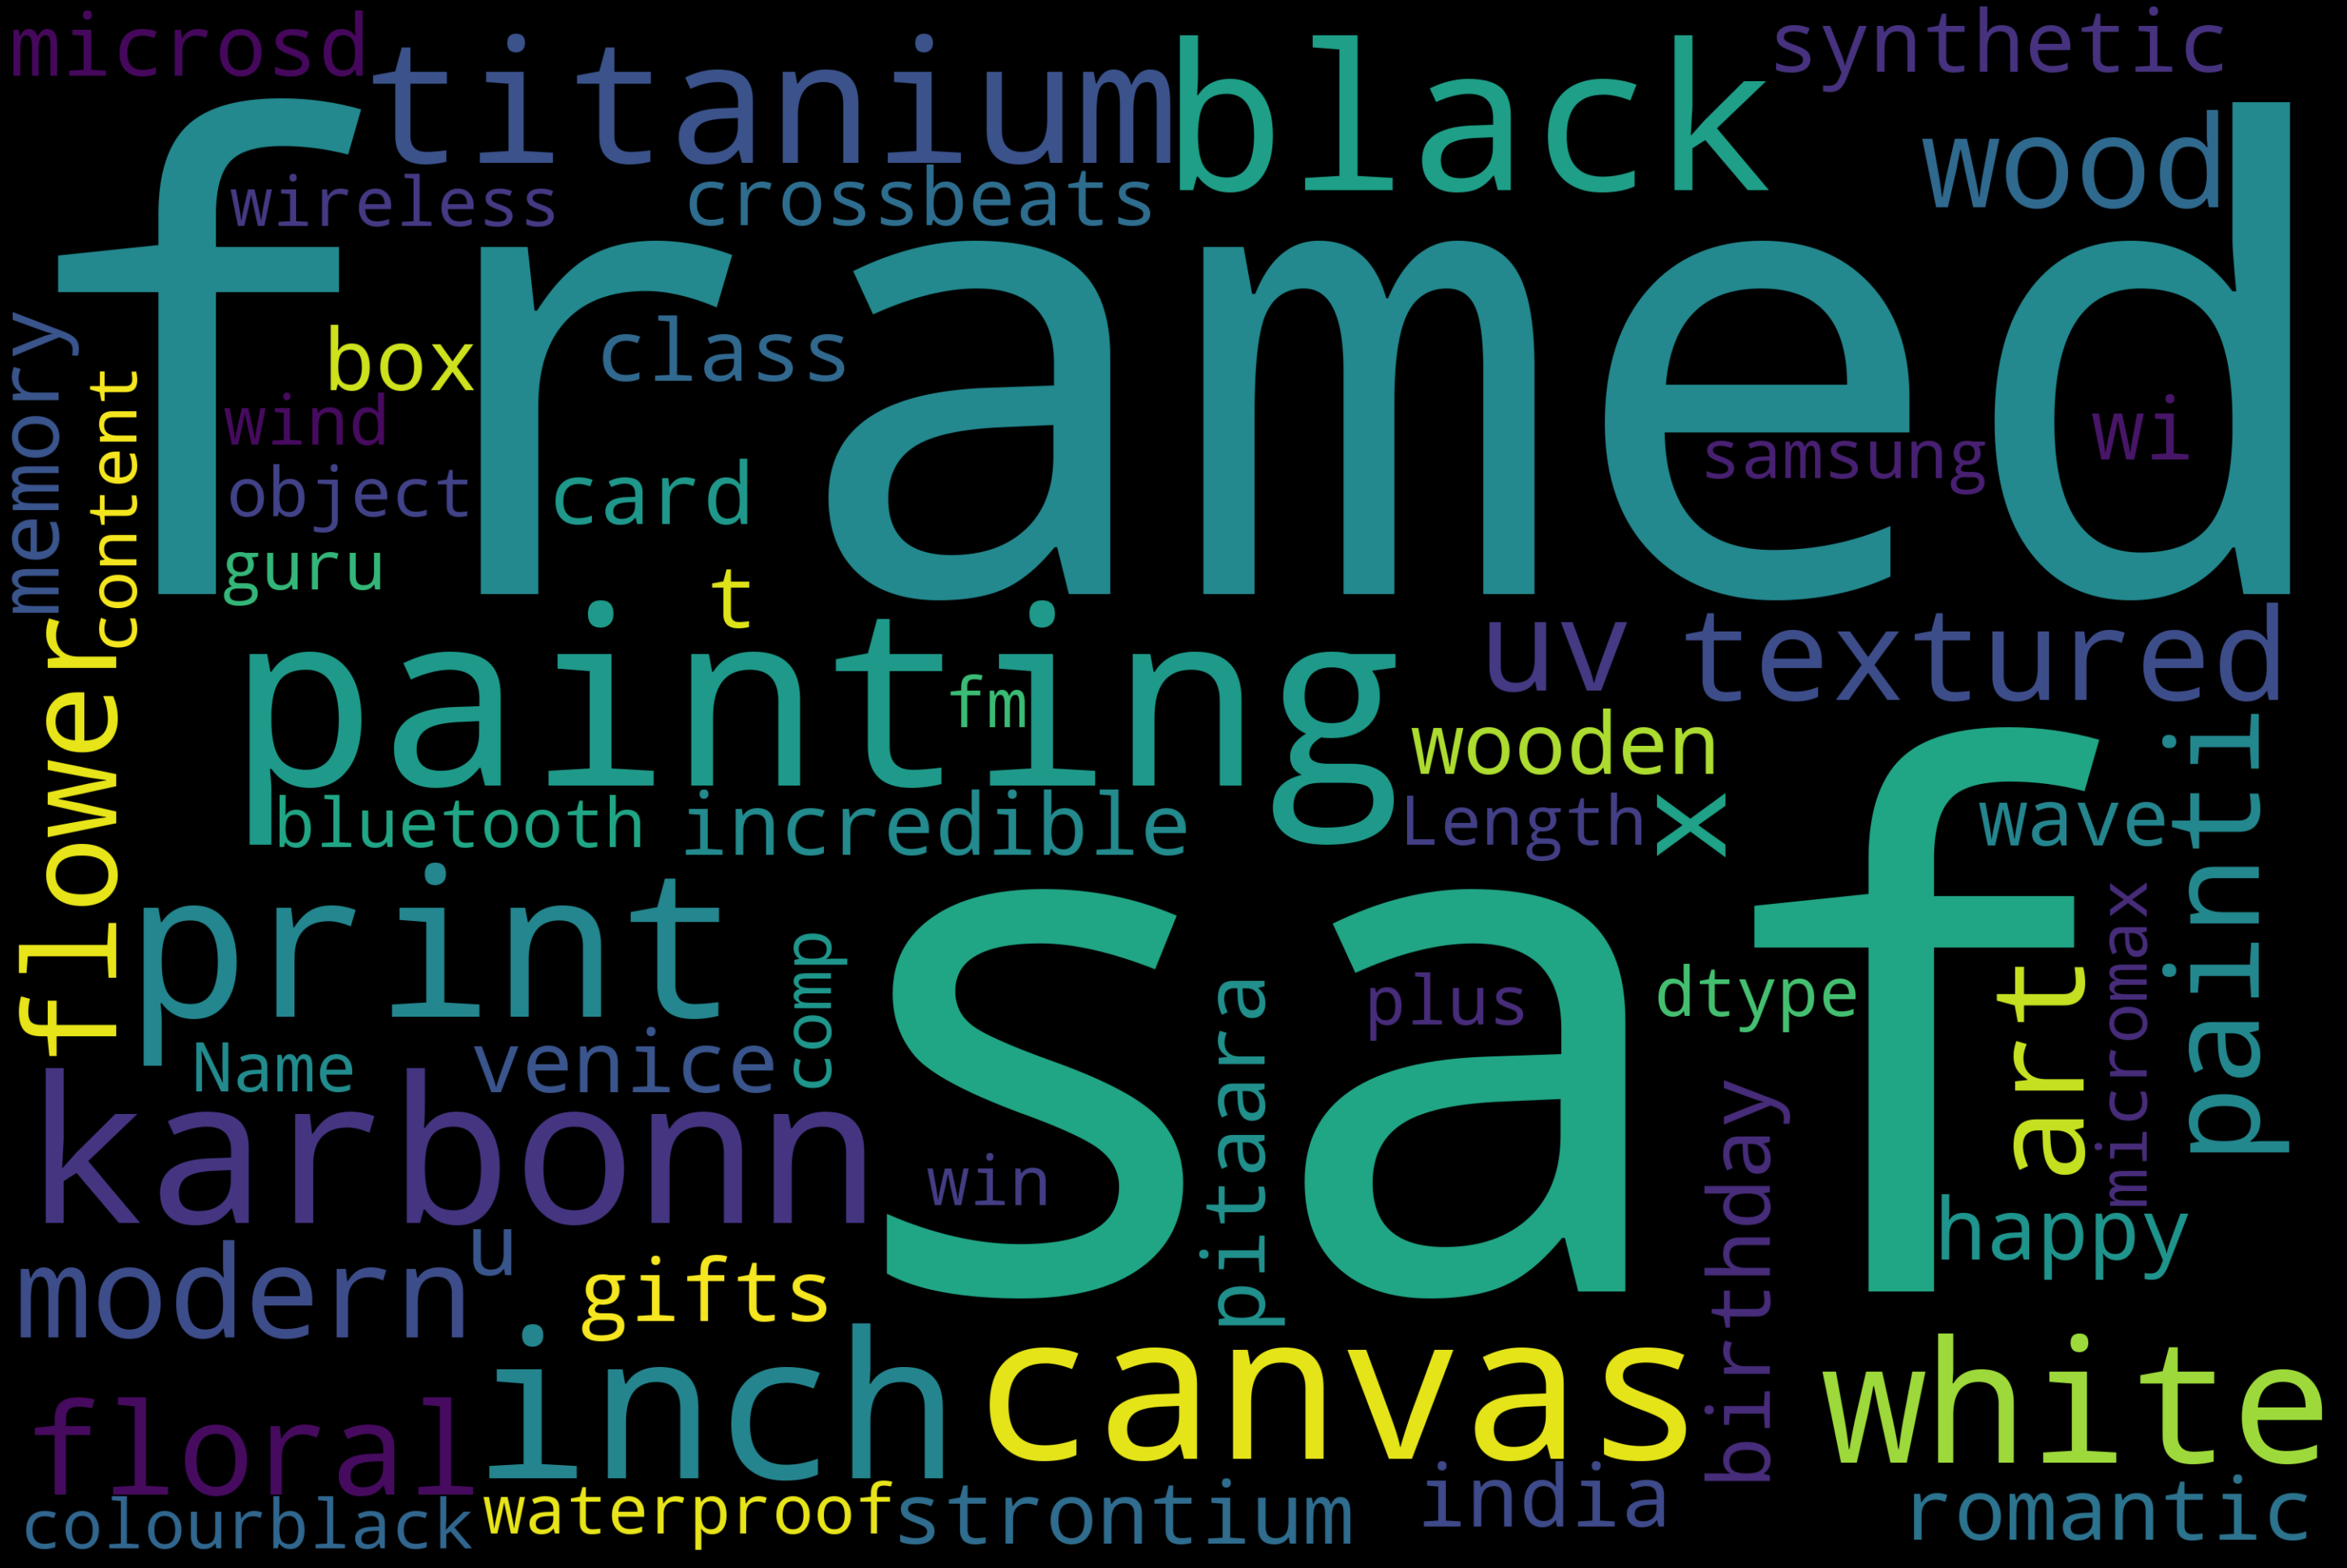

In [16]:
text = df["content"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [17]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the ecommerce content dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(df)):
    news = re.sub('[^a-zA-Z]', ' ', df['content'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news) 

In [18]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(df['content'])
X.shape

(50424, 5000)

In [19]:
# Create a new column 'househol_id' with encoded household 
df['household_id'] = df['Household'].factorize()[0]
category_id_df = df[['Household', 'household_id']].drop_duplicates()

In [20]:
category_id_df['household_id'].value_counts()

0    1
1    1
2    1
3    1
Name: household_id, dtype: int64

In [21]:

y = df['household_id'] # Target or the labels we want to predict 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
param_grid =  {'loss': ['hinge', 'squared_loss'], 'penalty': ['l2','l1'],
       'alpha':[0.01,0.001],'max_iter':[10]}

clf2 = GridSearchCV(SGDClassifier(), param_grid)
clf2.fit(X_train, y_train)
print("Best parameters are: ", clf2.best_params_)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/opt/con

Best parameters are:  {'alpha': 0.001, 'loss': 'squared_loss', 'max_iter': 10, 'penalty': 'l2'}


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,


In [24]:
from sklearn.metrics import classification_report 
y_pred = clf2.predict(X_test)
print("The classification report is:")
print(classification_report(y_test, y_pred))

print("The accuracy for testing data is", np.mean(y_pred == y_test) )
print("The accuracy for training data is", np.mean(clf2.predict(X_train) == y_train) )

The classification report is:
              precision    recall  f1-score   support

           0       0.74      0.96      0.83      4817
           1       0.95      0.76      0.84      2947
           2       0.95      0.78      0.86      2198
           3       0.93      0.77      0.85      2644

    accuracy                           0.84     12606
   macro avg       0.89      0.82      0.85     12606
weighted avg       0.87      0.84      0.84     12606

The accuracy for testing data is 0.8422179914326511
The accuracy for training data is 0.8518165952720926


In [25]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train, y_train)

In [26]:
from sklearn.metrics import classification_report 
y_pred = clf.predict(X_test)
print("The classification report is:")
print(classification_report(y_test, y_pred))

print("The accuracy for testing data is", np.mean(y_pred == y_test) )
print("The accuracy for training data is", np.mean(clf.predict(X_train) == y_train) )

The classification report is:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      4817
           1       0.95      0.76      0.84      2947
           2       0.92      0.83      0.87      2198
           3       0.92      0.81      0.86      2644

    accuracy                           0.85     12606
   macro avg       0.89      0.84      0.86     12606
weighted avg       0.87      0.85      0.85     12606

The accuracy for testing data is 0.8526891956211328
The accuracy for training data is 0.8610450050240627
